In [ ]:
import pandas as pd
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [ ]:
try:
  df =pd.read_csv("healthcare-dataset-stroke-data.csv")
  display(df.head())
except FileNotFoundError:
  print("Error: No file found at Location")
except pd.errors.ParserError:
  print("Not in format")
except Exception as e:
  print(f"An unexpected Error: {e}")

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.shape

(5110, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df1=df.copy()

In [ ]:
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
object_cols  = df.select_dtypes(include=['object']).columns.tolist()

binary_cols = [col for col in numeric_cols if df[col].nunique() == 2] + \
              [col for col in df.select_dtypes(include=['bool']).columns]

# Remove binary cols from numeric
numeric_cols = [col for col in numeric_cols if col not in binary_cols]

print("Numeric Columns:", numeric_cols)
print("Binary Columns:", binary_cols)
print("Object Columns:", object_cols)

Numeric Columns: ['id', 'age', 'avg_glucose_level', 'bmi']
Binary Columns: ['hypertension', 'heart_disease', 'stroke']
Object Columns: ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


In [ ]:
def histplot_plot(data,df):
    plt.figure(figsize=(4,4))
    sns.histplot(df[data],kde=True)
    plt.show()
def box_plot(data,df):
    plt.figure(figsize=(4,4))
    sns.boxplot(x=df[data])
    plt.show()
def kde_plot_wrt_target(data,df1):
    plt.figure(figsize=(4,4))
    for i in df["stroke"].unique():
        sns.kdeplot(df[df["stroke"] == i][data], label=i, fill=True)
    plt.legend()
    plt.show()

In [ ]:
numeric_cols[1]

'age'

In [ ]:
data=numeric_cols[1]

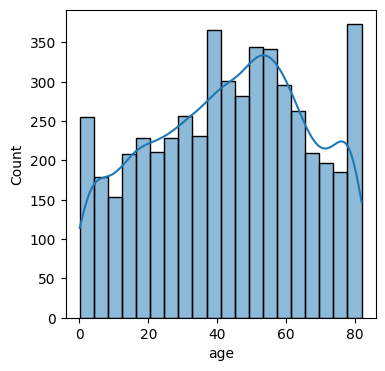

In [ ]:
histplot_plot(data,df1)

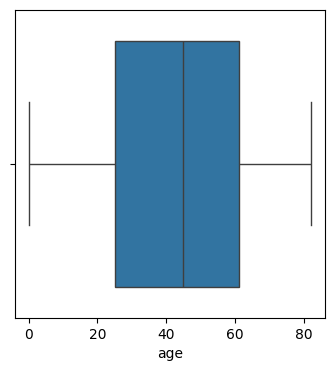

In [ ]:
box_plot(data,df1)

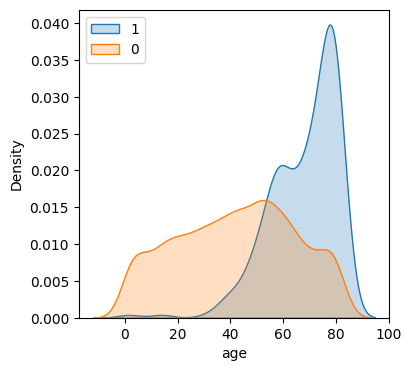

In [ ]:
kde_plot_wrt_target(data,df1)

In [ ]:
numeric_cols[2]

'avg_glucose_level'

In [ ]:
data=numeric_cols[2]

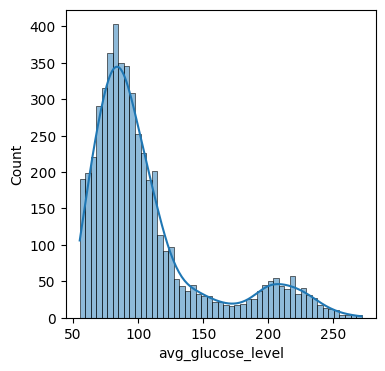

In [ ]:
histplot_plot(data,df1)

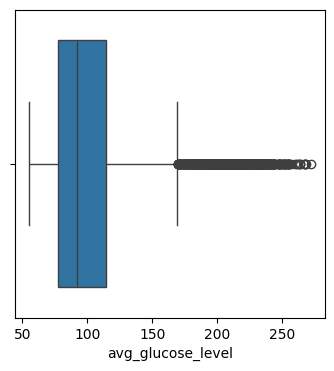

In [ ]:
box_plot(data,df1)

In [ ]:
# dataset is right skewed

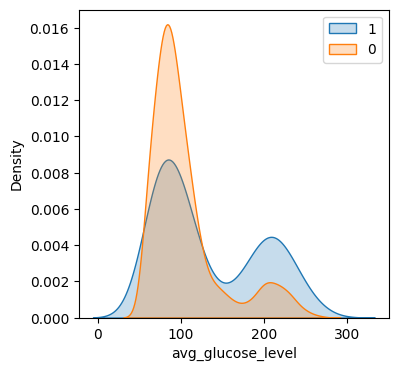

In [ ]:
kde_plot_wrt_target(data,df1)

In [ ]:
numeric_cols[3]

'bmi'

In [ ]:
data=numeric_cols[3]

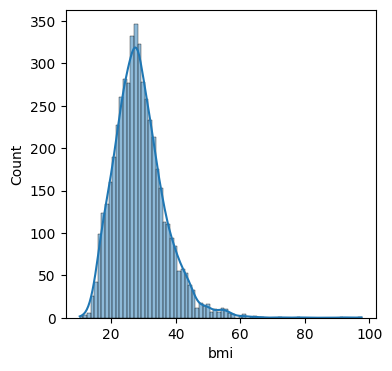

In [ ]:
histplot_plot(data,df1)

In [ ]:
# dataset is right skewed

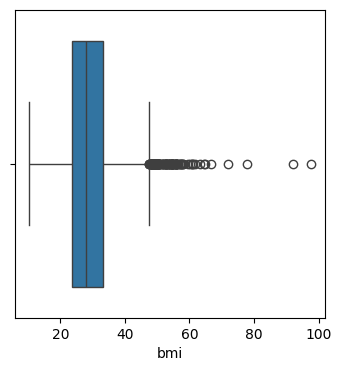

In [ ]:
box_plot(data,df1)

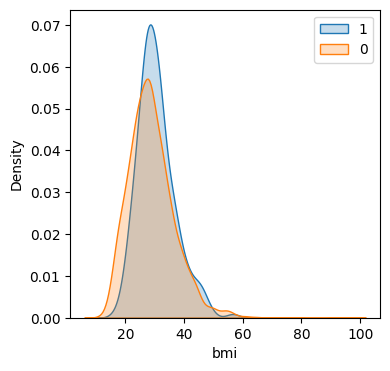

In [ ]:
kde_plot_wrt_target(data,df1)

In [ ]:
def value_counts_plot(data,df):
    plt.figure(figsize=(4,4))
    df[data].value_counts().plot(kind='bar')
    plt.show()
def count_plot_wrt_y(data,df):
    plt.figure(figsize=(4,4))
    sns.countplot(x=data,hue="stroke",data=df)
    plt.show()

In [ ]:
object_cols

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [ ]:
object_cols[0]

'gender'

In [ ]:
data=object_cols[0]

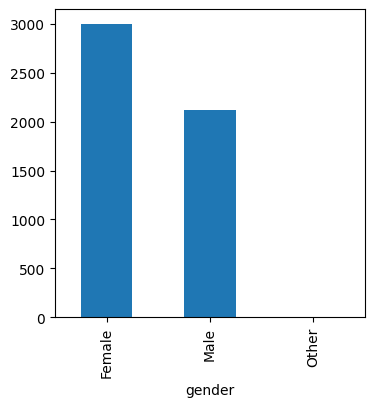

In [ ]:
value_counts_plot(data,df1)

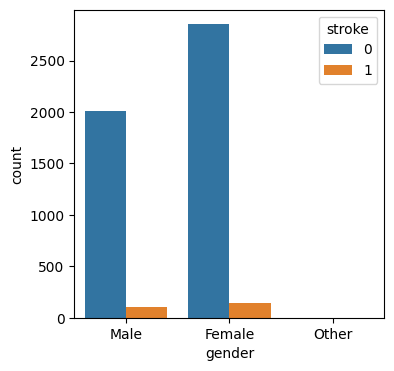

In [ ]:
count_plot_wrt_y(data,df1)

In [ ]:
object_cols[1]

'ever_married'

In [ ]:
data=object_cols[1]

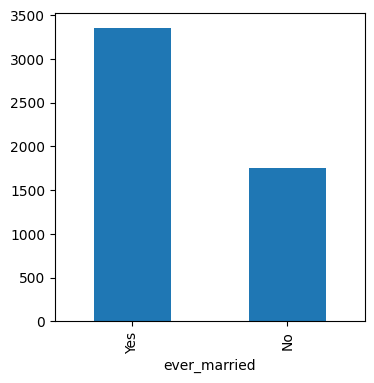

In [ ]:
value_counts_plot(data,df1)

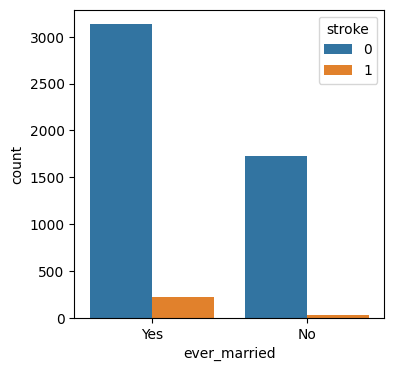

In [ ]:
count_plot_wrt_y(data,df1)

In [ ]:
object_cols[2]

'work_type'

In [ ]:
data=object_cols[3]

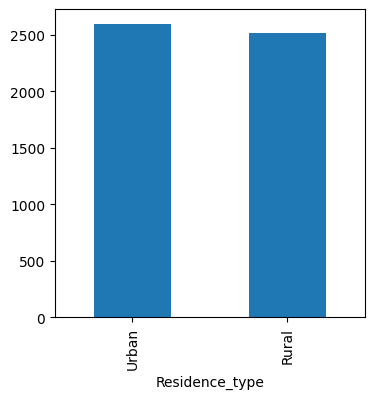

In [ ]:
value_counts_plot(data,df1)

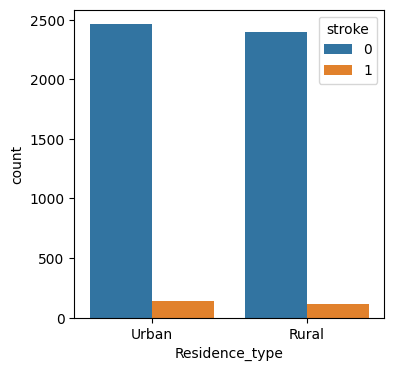

In [ ]:
count_plot_wrt_y(data,df1)

In [ ]:
object_cols[4]

'smoking_status'

In [ ]:
data=object_cols[4]

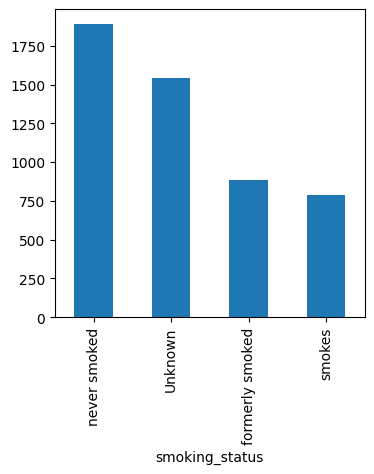

In [ ]:
value_counts_plot(data,df1)

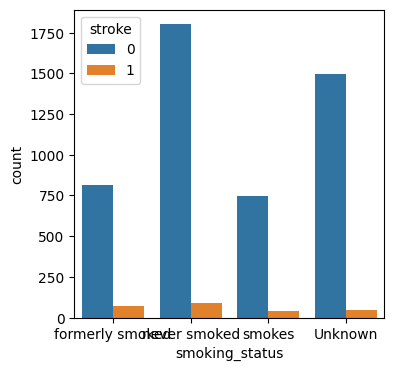

In [ ]:
count_plot_wrt_y(data,df1)

In [ ]:
binary_cols

['hypertension', 'heart_disease', 'stroke']

In [ ]:
binary_cols[0]

'hypertension'

In [ ]:
data=binary_cols[0]

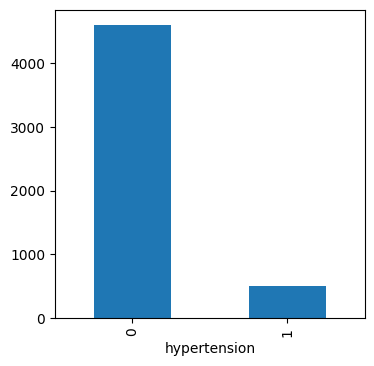

In [ ]:
value_counts_plot(data,df1)

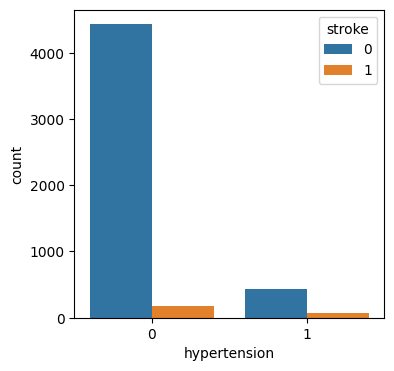

In [ ]:
count_plot_wrt_y(data,df1)

In [ ]:
binary_cols[1]

'heart_disease'

In [ ]:
data=binary_cols[1]

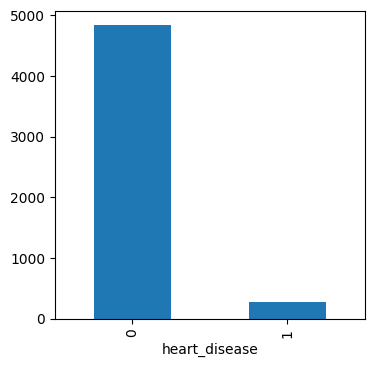

In [ ]:
value_counts_plot(data,df1)

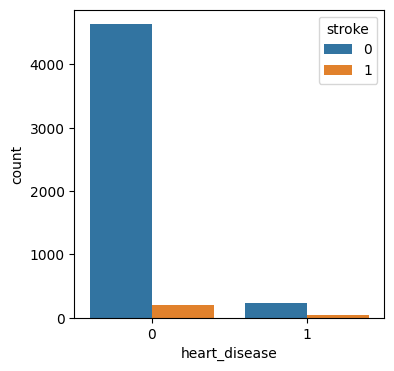

In [ ]:
count_plot_wrt_y(data,df1)

In [ ]:
df.isnull().mean()*100

,0
id,0.000000
gender,0.000000
age,0.000000
hypertension,0.000000
heart_disease,0.000000
ever_married,0.000000
work_type,0.000000
Residence_type,0.000000
avg_glucose_level,0.000000
bmi,3.933464


In [ ]:
df1 = df.fillna(df.mean(numeric_only=True))

In [ ]:
df1.isnull().mean()*100

,0
id,0.0
gender,0.0
age,0.0
hypertension,0.0
heart_disease,0.0
ever_married,0.0
work_type,0.0
Residence_type,0.0
avg_glucose_level,0.0
bmi,0.0


In [ ]:
object_cols

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [ ]:
df1 = pd.get_dummies(df1, object_cols, drop_first=True)

In [ ]:
df1.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.600000,1,True,False,True,False,True,False,False,True,True,False,False
1,51676,61.0,0,0,202.21,28.893237,1,False,False,True,False,False,True,False,False,False,True,False
2,31112,80.0,0,1,105.92,32.500000,1,True,False,True,False,True,False,False,False,False,True,False
3,60182,49.0,0,0,171.23,34.400000,1,False,False,True,False,True,False,False,True,False,False,True
4,1665,79.0,1,0,174.12,24.000000,1,False,False,True,False,False,True,False,False,False,True,False


In [ ]:
X = df1.drop(["id","stroke"], axis=1)
y = df1["stroke"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

print("Befor SMOTE :",y.value_counts(),"After SMOTE :",y_smote.value_counts())

Befor SMOTE : stroke
0    4861
1     249
Name: count, dtype: int64 After SMOTE : stroke
0    3901
1    3901
Name: count, dtype: int64


In [ ]:
scaler = StandardScaler()
X_train_processed = scaler.fit_transform(X_smote)
X_test_processed = scaler.transform(X_test)
X_train_processed = pd.DataFrame(X_train_processed, columns=X.columns)
X_test_processed = pd.DataFrame(X_test_processed, columns=X.columns)
display(X_train_processed.head())
display(X_test_processed.head())

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1.086020,-0.293299,-0.223125,-0.110217,-0.155139,0.928947,0.0,0.486866,-0.050695,-1.504350,1.535770,-0.282598,-1.333229,1.474492,-0.918937,-0.549015
1,0.314371,-0.293299,-0.223125,-0.559621,1.015071,-1.076488,0.0,0.486866,-0.050695,0.664739,-0.651139,-0.282598,0.750058,-0.678200,-0.918937,-0.549015
2,-1.546665,-0.293299,-0.223125,-1.091810,0.625001,-1.076488,0.0,-2.053955,-0.050695,0.664739,-0.651139,-0.282598,-1.333229,-0.678200,1.088214,-0.549015
3,-1.092753,-0.293299,-0.223125,-0.977611,0.129912,0.928947,0.0,0.486866,-0.050695,-1.504350,-0.651139,-0.282598,0.750058,1.474492,-0.918937,-0.549015
4,-1.092753,-0.293299,-0.223125,-1.089777,-1.445371,-1.076488,0.0,-2.053955,-0.050695,0.664739,-0.651139,-0.282598,-1.333229,-0.678200,1.088214,-0.549015


,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,-1.092753,-0.293299,-0.223125,-0.993318,-0.980287,0.928947,0.0,-2.053955,-0.050695,-1.50435,1.535770,-0.282598,-1.333229,-0.6782,-0.918937,-0.549015
1,-0.684233,-0.293299,-0.223125,-0.985187,-0.185144,0.928947,0.0,0.486866,-0.050695,-1.50435,1.535770,-0.282598,-1.333229,-0.6782,1.088214,-0.549015
2,-2.136749,-0.293299,-0.223125,-0.816476,-1.055301,-1.076488,0.0,-2.053955,-0.050695,-1.50435,-0.651139,3.538596,0.750058,-0.6782,-0.918937,-0.549015
3,1.086020,3.409486,-0.223125,-0.775453,-1.505382,-1.076488,0.0,0.486866,-0.050695,-1.50435,1.535770,-0.282598,-1.333229,-0.6782,1.088214,-0.549015
4,0.904456,-0.293299,-0.223125,-0.440433,-0.350174,-1.076488,0.0,0.486866,-0.050695,-1.50435,-0.651139,-0.282598,-1.333229,-0.6782,1.088214,-0.549015


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_processed, y_smote)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred_train=dt_model.predict(X_train_processed)
y_pred_test=dt_model.predict(X_test_processed)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_classification(y_true, y_pred):
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, average='weighted'))
    print("Recall:", recall_score(y_true, y_pred, average='weighted'))
    print("F1 Score:", f1_score(y_true, y_pred, average='weighted'))
    print("Classification Report:\n", classification_report(y_true, y_pred))
    plt.figure(figsize=(3,3))
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.tight_layout()
    plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

def plot_roc_auc(model, X_test, y_test, model_name="Model"):
    # Get predicted probabilities (for positive class)
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)[:, 1]
    else:  # some models (like SVM) may not have predict_proba
        y_score = model.decision_function(X_test)

    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_score)
    auc = roc_auc_score(y_test, y_score)

    # Plot
    plt.figure(figsize=(6,6))
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc:.3f})", lw=2)
    plt.plot([0,1], [0,1], linestyle="--", color="gray")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {model_name}")
    plt.legend(loc="lower right")
    plt.show()


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3901
           1       1.00      1.00      1.00      3901

    accuracy                           1.00      7802
   macro avg       1.00      1.00      1.00      7802
weighted avg       1.00      1.00      1.00      7802



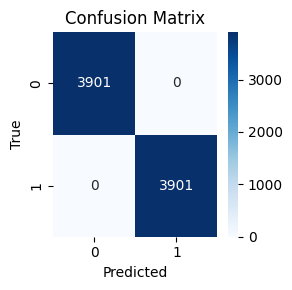

**************************************************
Accuracy: 0.8923679060665362
Precision: 0.9028480364222555
Recall: 0.8923679060665362
F1 Score: 0.8974322140281241
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.94       960
           1       0.18      0.23      0.20        62

    accuracy                           0.89      1022
   macro avg       0.57      0.58      0.57      1022
weighted avg       0.90      0.89      0.90      1022



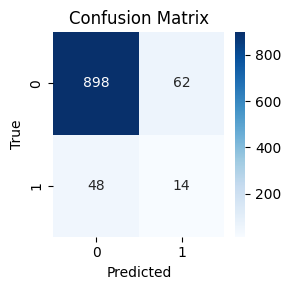

In [ ]:
evaluate_classification(y_smote,y_pred_train)
print("*"*50)
evaluate_classification(y_test,y_pred_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier(random_state=42)
rf_model.fit(X_train_processed, y_smote)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_train=rf_model.predict(X_train_processed)
y_pred_test=rf_model.predict(X_test_processed)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3901
           1       1.00      1.00      1.00      3901

    accuracy                           1.00      7802
   macro avg       1.00      1.00      1.00      7802
weighted avg       1.00      1.00      1.00      7802



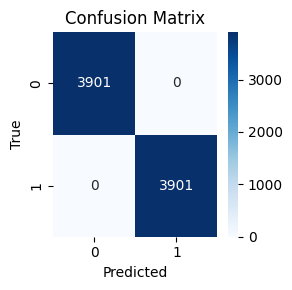

**************************************************
Accuracy: 0.9285714285714286
Precision: 0.9096151073951276
Recall: 0.9285714285714286
F1 Score: 0.9172341412218399
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96       960
           1       0.32      0.16      0.22        62

    accuracy                           0.93      1022
   macro avg       0.64      0.57      0.59      1022
weighted avg       0.91      0.93      0.92      1022



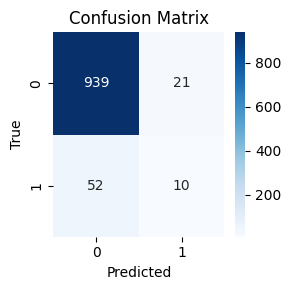

In [ ]:
evaluate_classification(y_smote,y_pred_train)
print("*"*50)
evaluate_classification(y_test,y_pred_test)

ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train_processed, y_smote)

SVC(random_state=42)

In [ ]:
y_pred_train=svm_model.predict(X_train_processed)
y_pred_test=svm_model.predict(X_test_processed)

Accuracy: 0.9166880287105871
Precision: 0.916881323038418
Recall: 0.9166880287105871
F1 Score: 0.9166783703273066
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92      3901
           1       0.91      0.93      0.92      3901

    accuracy                           0.92      7802
   macro avg       0.92      0.92      0.92      7802
weighted avg       0.92      0.92      0.92      7802



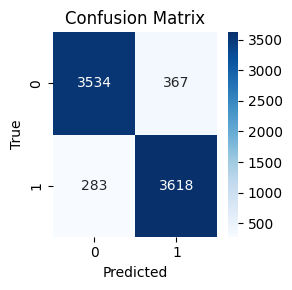

**************************************************
Accuracy: 0.8532289628180039
Precision: 0.902115594994748
Recall: 0.8532289628180039
F1 Score: 0.8752419852586477
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.89      0.92       960
           1       0.15      0.29      0.19        62

    accuracy                           0.85      1022
   macro avg       0.55      0.59      0.56      1022
weighted avg       0.90      0.85      0.88      1022



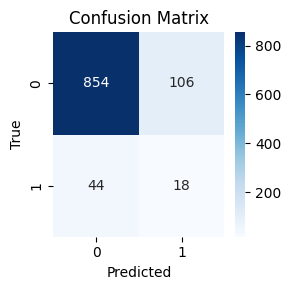

In [ ]:
evaluate_classification(y_smote,y_pred_train)
print("*"*50)
evaluate_classification(y_test,y_pred_test)

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_processed, y_smote)

KNeighborsClassifier()

In [ ]:
y_pred_train=knn_model.predict(X_train_processed)
y_pred_test=knn_model.predict(X_test_processed)

Accuracy: 0.9501409894898744
Precision: 0.9509090382493806
Recall: 0.9501409894898744
F1 Score: 0.9501197488061646
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.93      0.95      3901
           1       0.93      0.97      0.95      3901

    accuracy                           0.95      7802
   macro avg       0.95      0.95      0.95      7802
weighted avg       0.95      0.95      0.95      7802



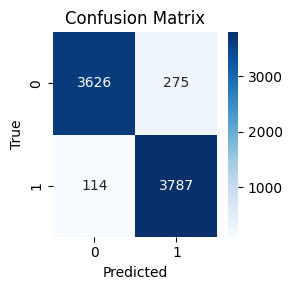

**************************************************
Accuracy: 0.863013698630137
Precision: 0.9007799698499049
Recall: 0.863013698630137
F1 Score: 0.8803718316301943
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.90      0.93       960
           1       0.15      0.26      0.19        62

    accuracy                           0.86      1022
   macro avg       0.55      0.58      0.56      1022
weighted avg       0.90      0.86      0.88      1022



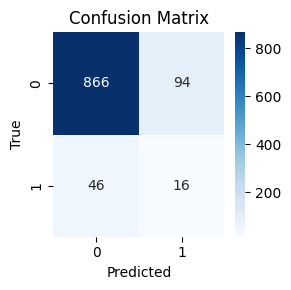

In [ ]:
evaluate_classification(y_smote,y_pred_train)
print("*"*50)
evaluate_classification(y_test,y_pred_test)

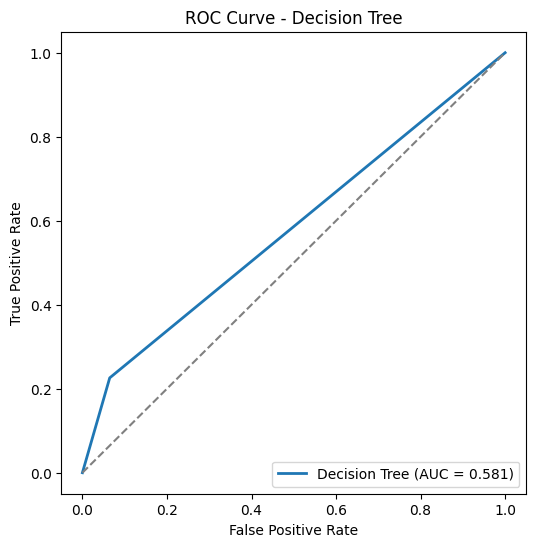

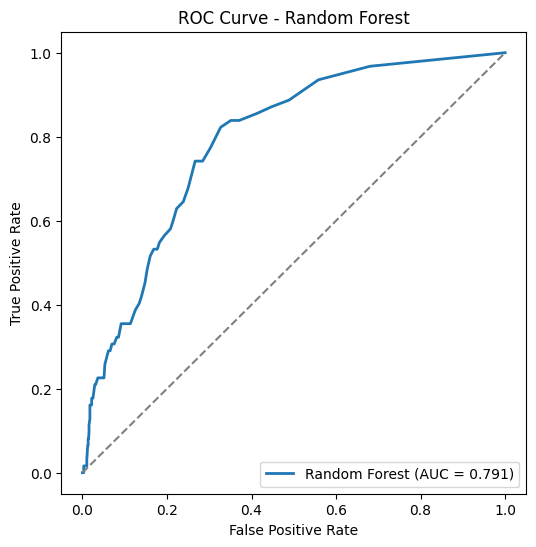

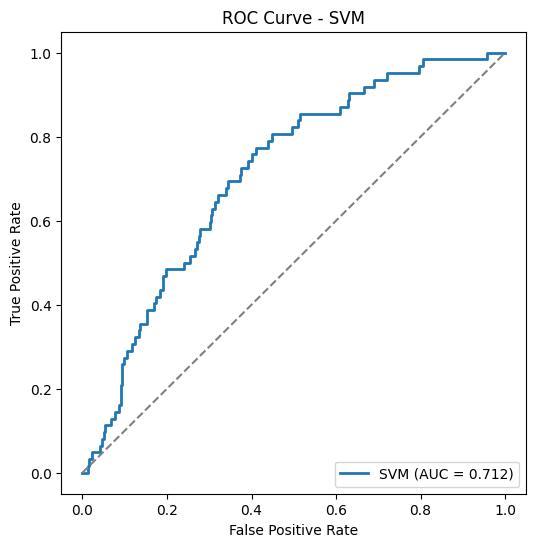

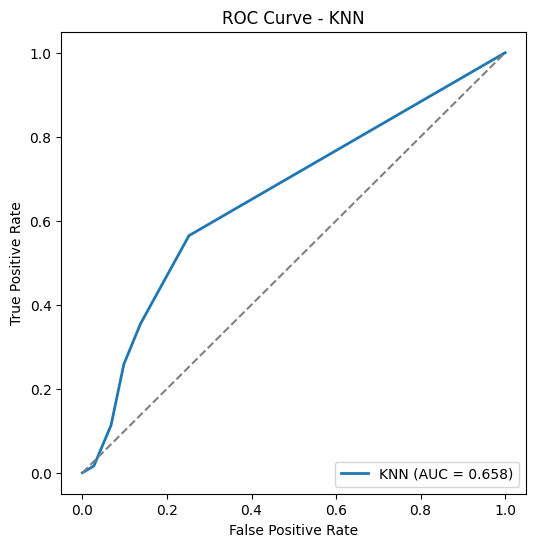

In [ ]:
plot_roc_auc(dt_model, X_test_processed, y_test, model_name="Decision Tree")
plot_roc_auc(rf_model, X_test_processed, y_test, model_name="Random Forest")
plot_roc_auc(svm_model, X_test_processed, y_test, model_name="SVM")
plot_roc_auc(knn_model, X_test_processed, y_test, model_name="KNN")

In [ ]:
# HPT

In [ ]:
# dt

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid={
    "max_depth":[None,10,20,30,40],
    "min_samples_split":[2,5,10,15],
    "min_samples_leaf":[1,2,4,5],
    "criterion":["gini","entropy"]
    }
grid_search=GridSearchCV(estimator=dt_model,param_grid=param_grid,cv=5,scoring="accuracy",n_jobs=-1)
grid_search.fit(X_train_processed,y_smote)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40],
                         'min_samples_leaf': [1, 2, 4, 5],
                         'min_samples_split': [2, 5, 10, 15]},
             scoring='accuracy')

In [ ]:
best_params=grid_search.best_params_
best_dt_model=grid_search.best_estimator_
best_score=grid_search.best_score_
print("Best Parameters:",best_params)
print("Best Estimator:",best_dt_model)
print("Best Score:",best_score)

Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Estimator: DecisionTreeClassifier(random_state=42)
Best Score: 0.9315609651932523


In [ ]:
y_pred_train=best_dt_model.predict(X_train_processed)
y_pred_test=best_dt_model.predict(X_test_processed)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3901
           1       1.00      1.00      1.00      3901

    accuracy                           1.00      7802
   macro avg       1.00      1.00      1.00      7802
weighted avg       1.00      1.00      1.00      7802



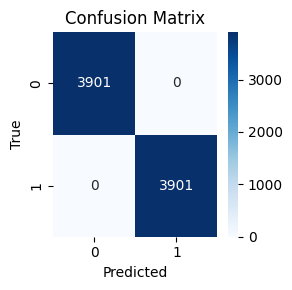

**************************************************
Accuracy: 0.8923679060665362
Precision: 0.9028480364222555
Recall: 0.8923679060665362
F1 Score: 0.8974322140281241
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.94       960
           1       0.18      0.23      0.20        62

    accuracy                           0.89      1022
   macro avg       0.57      0.58      0.57      1022
weighted avg       0.90      0.89      0.90      1022



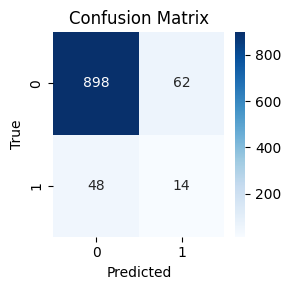

In [ ]:
evaluate_classification(y_smote,y_pred_train)
print("*"*50)
evaluate_classification(y_test,y_pred_test)

In [ ]:
# RF

In [ ]:
param_grid={
    "n_estimators":[10,20,30,40],
    "max_depth":[None,10,20,30,40],
    "min_samples_split":[2,5,10,15],
    "min_samples_leaf":[1,2,4,5],
    "criterion":["gini","entropy"]
    }
grid_search=GridSearchCV(estimator=rf_model,param_grid=param_grid,cv=5,scoring="accuracy",n_jobs=-1)
grid_search.fit(X_train_processed,y_smote)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40],
                         'min_samples_leaf': [1, 2, 4, 5],
                         'min_samples_split': [2, 5, 10, 15],
                         'n_estimators': [10, 20, 30, 40]},
             scoring='accuracy')

In [ ]:
best_params=grid_search.best_params_
best_rf_model=grid_search.best_estimator_
best_score=grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Estimator: {best_rf_model}")
print(f"Best Score: {best_score}")


Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 40}
Best Estimator: RandomForestClassifier(criterion='entropy', n_estimators=40, random_state=42)
Best Score: 0.9586051019234876


In [ ]:
y_pred_train=best_rf_model.predict(X_train_processed)
y_pred_test=best_rf_model.predict(X_test_processed)

Accuracy: 0.9997436554729556
Precision: 0.9997437868306431
Recall: 0.9997436554729556
F1 Score: 0.9997436554561107
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3901
           1       1.00      1.00      1.00      3901

    accuracy                           1.00      7802
   macro avg       1.00      1.00      1.00      7802
weighted avg       1.00      1.00      1.00      7802



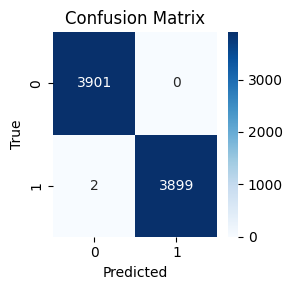

**************************************************
Accuracy: 0.9227005870841487
Precision: 0.9061414419873498
Recall: 0.9227005870841487
F1 Score: 0.9134373430601905
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       960
           1       0.27      0.16      0.20        62

    accuracy                           0.92      1022
   macro avg       0.61      0.57      0.58      1022
weighted avg       0.91      0.92      0.91      1022



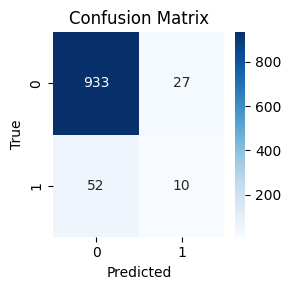

In [ ]:
evaluate_classification(y_smote,y_pred_train)
print("*"*50)
evaluate_classification(y_test,y_pred_test)

In [ ]:
# KNN

In [ ]:
knn_params = {
    'n_neighbors': list(range(1, 21)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']}
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, scoring='accuracy', n_jobs=-1)
knn_grid.fit(X_train_processed,y_smote)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
best_params=knn_grid.best_params_
best_knn_model=knn_grid.best_estimator_
best_score=knn_grid.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Estimator: {best_knn_model}")
print(f"Best Score: {best_score}")


Best Parameters: {'metric': 'manhattan', 'n_neighbors': 2, 'weights': 'uniform'}
Best Estimator: KNeighborsClassifier(metric='manhattan', n_neighbors=2)
Best Score: 0.9514283250381904


In [ ]:
y_pred_train=best_knn_model.predict(X_train_processed)
y_pred_test=best_knn_model.predict(X_test_processed)

Accuracy: 0.9851320174314279
Precision: 0.9855613642021409
Recall: 0.9851320174314279
F1 Score: 0.985128730034506
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      3901
           1       1.00      0.97      0.98      3901

    accuracy                           0.99      7802
   macro avg       0.99      0.99      0.99      7802
weighted avg       0.99      0.99      0.99      7802



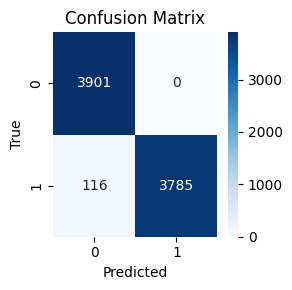

**************************************************
Accuracy: 0.8972602739726028
Precision: 0.8898028066227782
Recall: 0.8972602739726028
F1 Score: 0.893479696590487
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.95       960
           1       0.09      0.08      0.09        62

    accuracy                           0.90      1022
   macro avg       0.52      0.52      0.52      1022
weighted avg       0.89      0.90      0.89      1022



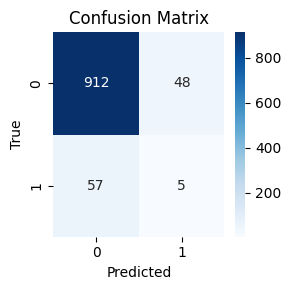

In [ ]:
evaluate_classification(y_smote,y_pred_train)
print("*"*50)
evaluate_classification(y_test,y_pred_test)

In [ ]:
# SVM

In [ ]:
svm_params = {
    'C': [0.1, 1, 10, 100],       # Regularization strength
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']    # Kernel coefficient
}

svm_grid = GridSearchCV(SVC(), svm_params, cv=5, scoring='accuracy', n_jobs=-1)
svm_grid.fit(X_train_processed,y_smote)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [ ]:
best_params=svm_grid.best_params_
best_svm_model=svm_grid.best_estimator_
best_score=svm_grid.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Estimator: {best_svm_model}")
print(f"Best Score: {best_score}")

Best Parameters: {'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}
Best Estimator: SVC(C=100, gamma='auto')
Best Score: 0.9243836955271932


In [ ]:
y_pred_train=best_svm_model.predict(X_train_processed)
y_pred_test=best_svm_model.predict(X_test_processed)

Accuracy: 0.9556523968213279
Precision: 0.9560019089660969
Recall: 0.9556523968213279
F1 Score: 0.9556438974070457
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.96      3901
           1       0.94      0.97      0.96      3901

    accuracy                           0.96      7802
   macro avg       0.96      0.96      0.96      7802
weighted avg       0.96      0.96      0.96      7802



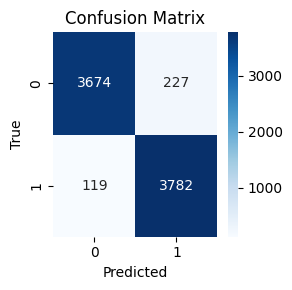

**************************************************
Accuracy: 0.8620352250489237
Precision: 0.8966521336130395
Recall: 0.8620352250489237
F1 Score: 0.8782168467317476
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.90      0.92       960
           1       0.12      0.21      0.16        62

    accuracy                           0.86      1022
   macro avg       0.54      0.56      0.54      1022
weighted avg       0.90      0.86      0.88      1022



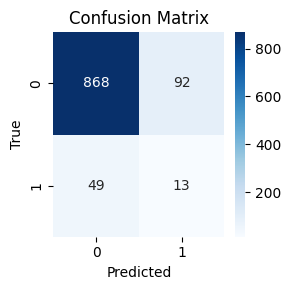

In [ ]:
evaluate_classification(y_smote,y_pred_train)
print("*"*50)
evaluate_classification(y_test,y_pred_test)

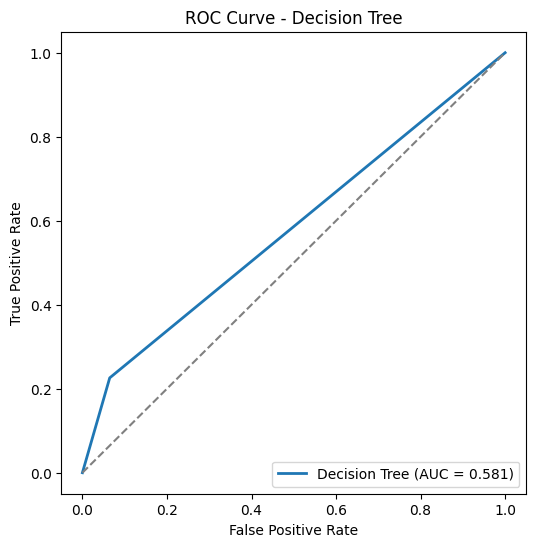

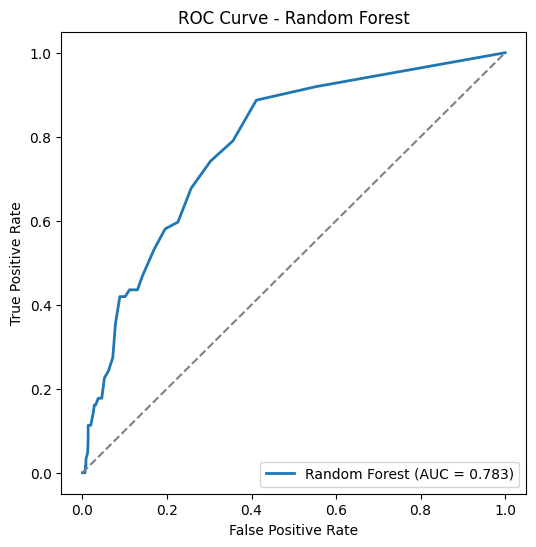

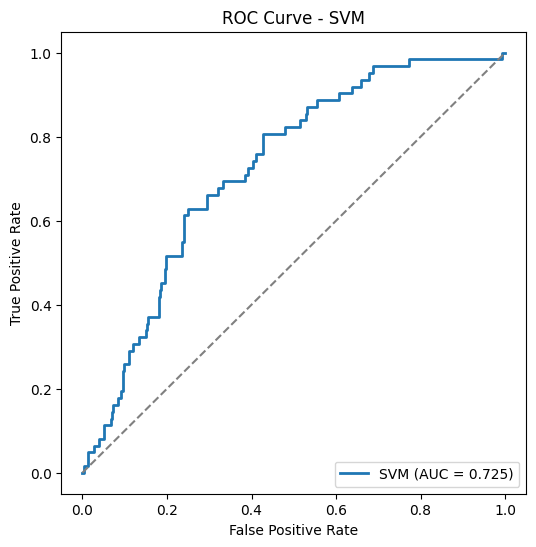

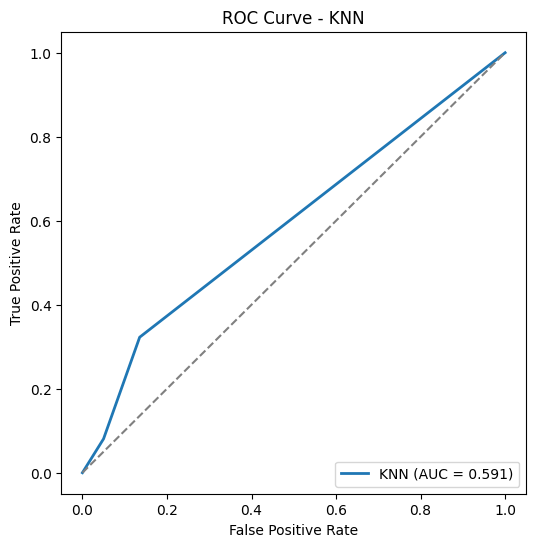

In [ ]:
plot_roc_auc(best_dt_model, X_test_processed, y_test, model_name="Decision Tree")
plot_roc_auc(best_rf_model, X_test_processed, y_test, model_name="Random Forest")
plot_roc_auc(best_svm_model, X_test_processed, y_test, model_name="SVM")
plot_roc_auc(best_knn_model, X_test_processed, y_test, model_name="KNN")